In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
outpath='HAT-264-0000668.rlc.tfalc'
data=Table.read(outpath,format='ascii')
t=data['col2']
mag=data['col8']

Text(0.5, 0, 'time (BJD-2454833)')

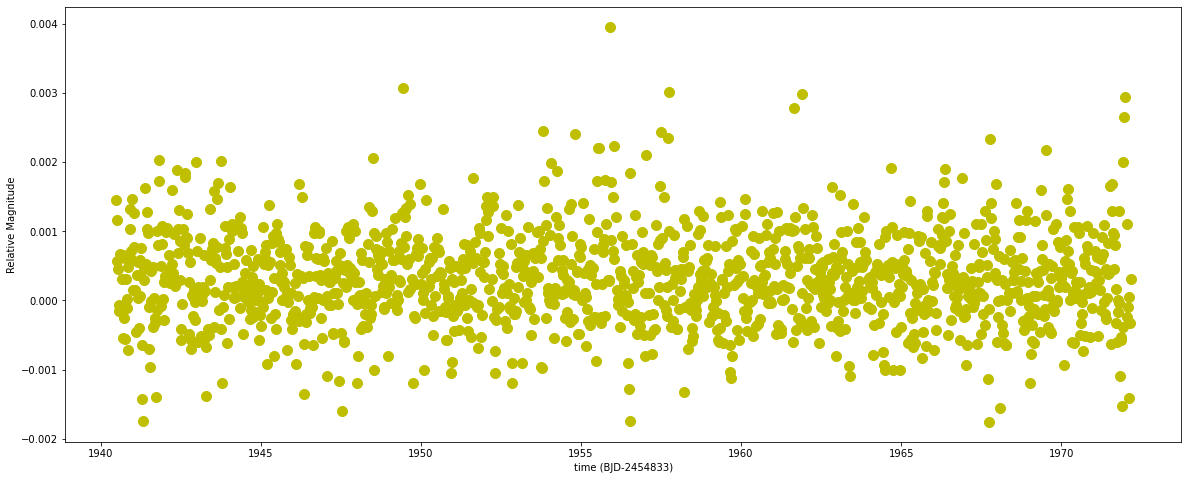

In [3]:
plt.figure(figsize=(20,8))
plt.plot(t,mag,'yo',markersize=10,label='HAT-264-0000668')
plt.ylabel('Relative Magnitude')
plt.xlabel('time (BJD-2454833)')

In [4]:
import astrobase
from astrobase import periodbase, checkplot
periodbase.use_astropy_bls()

[I 200817 13:56:31 __init__:84] An Astropy implementation of BLS is available because Astropy >= 3.1.
[I 200817 13:56:31 __init__:86] If you want to use it as the default periodbase BLS runner, call the periodbase.use_astropy_bls() function.


In [5]:
dates=data['col2']
fluxes=data['col8']
errs=fluxes*0.01

In [6]:
glsp = periodbase.pgen_lsp(dates,fluxes,errs)

[I 200817 13:56:36 zgls:597] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200817 13:56:36 zgls:607] using 6 workers...


In [7]:
cp = checkplot.checkplot_png(glsp, dates, fluxes, errs)

[I 200817 13:56:42 nonphysical:216] spline fit done. nknots = 13,  chisq = 13248854.04702, reduced chisq = 9901.98359
[I 200817 13:56:42 png:696] plotting phased LC with period 0.984148, epoch 1940.47764
[I 200817 13:56:42 nonphysical:216] spline fit done. nknots = 13,  chisq = 13352371.20222, reduced chisq = 9979.35067
[I 200817 13:56:42 png:696] plotting phased LC with period 0.492074, epoch 1946.38237
[I 200817 13:56:42 nonphysical:216] spline fit done. nknots = 13,  chisq = 13220321.95919, reduced chisq = 9880.65916
[I 200817 13:56:42 png:696] plotting phased LC with period 1.968295, epoch 1946.38237
[I 200817 13:56:42 nonphysical:216] spline fit done. nknots = 13,  chisq = 13102061.17348, reduced chisq = 9792.27292
[I 200817 13:56:42 png:696] plotting phased LC with period 0.109049, epoch 1943.86928
[I 200817 13:56:42 nonphysical:216] spline fit done. nknots = 13,  chisq = 13143690.58609, reduced chisq = 9823.38609
[I 200817 13:56:42 png:696] plotting phased LC with period 0.12976

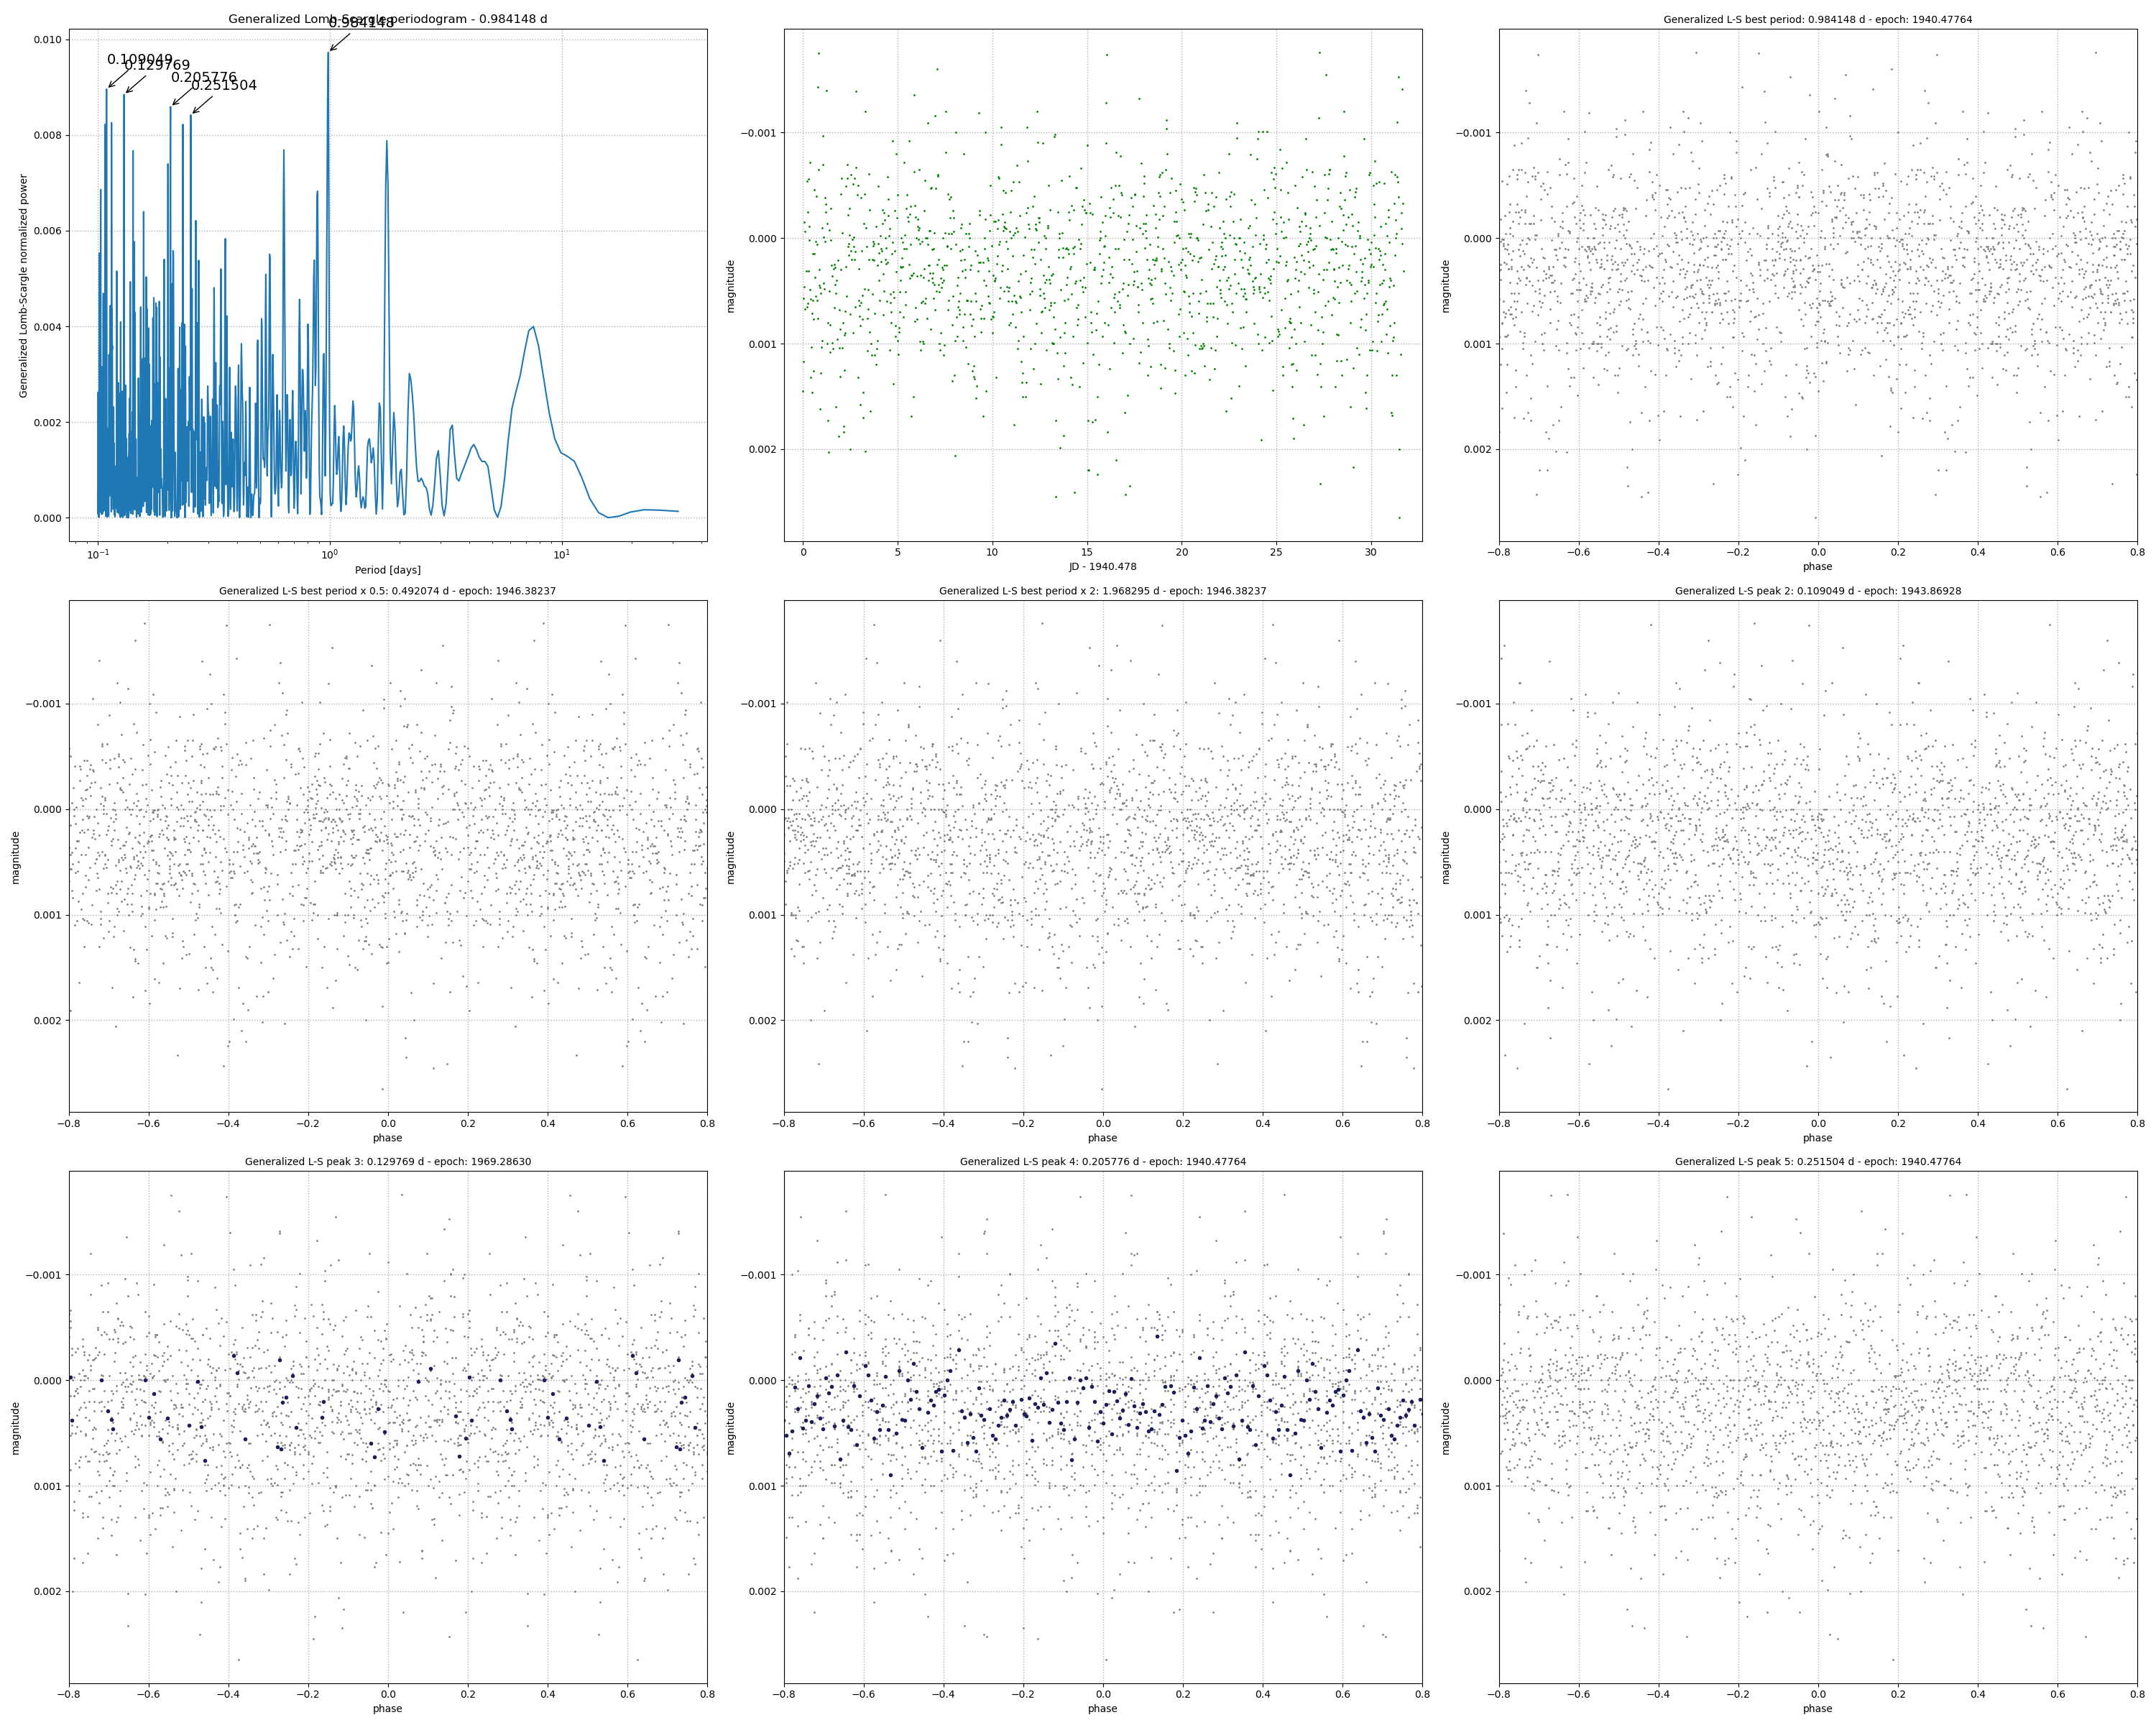

In [8]:
from IPython.display import Image
Image('0000668-checkplot-glsp.png')

In [9]:
glsp

{'bestperiod': 0.9841476596273323,
 'bestlspval': 0.009725578088419291,
 'nbestpeaks': 5,
 'nbestlspvals': [0.009725578088419291,
  0.008959086529640245,
  0.008844167792943204,
  0.008588693150026009,
  0.008416127555563323],
 'nbestperiods': [0.9841476596273323,
  0.10904870832759843,
  0.1297688560196564,
  0.20577632883116947,
  0.25150440190476264],
 'lspvals': array([1.34766187e-04, 1.59723906e-04, 1.68078640e-04, ...,
        8.96380180e-05, 2.25684579e-04, 4.87540469e-04]),
 'omegas': array([ 0.19827307,  0.23792768,  0.2775823 , ..., 62.73359957,
        62.77325418, 62.81290879]),
 'periods': array([31.68955464, 26.4079622 , 22.63539617, ...,  0.10015662,
         0.10009335,  0.10003016]),
 'method': 'gls',
 'kwargs': {'startp': None,
  'endp': None,
  'stepsize': 0.0001,
  'autofreq': True,
  'periodepsilon': 0.1,
  'nbestpeaks': 5,
  'sigclip': 10.0}}

In [10]:
print('LS algorithm:',(glsp['nbestperiods']),'(days)')

LS algorithm: [0.9841476596273323, 0.10904870832759843, 0.1297688560196564, 0.20577632883116947, 0.25150440190476264] (days)


In [11]:
bls=periodbase.bls_parallel_pfind(dates,fluxes,errs)

[I 200817 13:57:38 abls:919] min P: 0.1, max P: 100.0, nfreq: 126632, minfreq: 0.01, maxfreq: 10.0
[I 200817 13:57:38 abls:922] autofreq = True: using AUTOMATIC values for freq stepsize: 7.889034820465348e-05, ndurations: 100, min transit duration: 0.01, max transit duration: 0.4
[W 200817 13:57:38 abls:964] the requested max P = 100.000 is larger than the time base of the observations = 31.690,  will make minfreq = 2 x 1/timebase
[W 200817 13:57:38 abls:969] new minfreq: 0.06311227856372278, maxfreq: 10.0
[I 200817 13:57:38 abls:980] using 6 workers...
[I 200817 13:57:38 abls:1090] worker 1: minfreq = 0.063112, nfreqs = 21105
[I 200817 13:57:38 abls:1090] worker 2: minfreq = 1.728093, nfreqs = 21105
[I 200817 13:57:38 abls:1090] worker 3: minfreq = 3.393074, nfreqs = 21105
[I 200817 13:57:38 abls:1090] worker 4: minfreq = 5.058055, nfreqs = 21105
[I 200817 13:57:38 abls:1090] worker 5: minfreq = 6.723035, nfreqs = 21105
[I 200817 13:57:38 abls:1090] worker 6: minfreq = 8.388016, nfreq

In [12]:
cp = checkplot.checkplot_png(bls, dates, fluxes, errs)

[W 200817 13:57:53 png:1142] no best period found for this object, skipping...


In [13]:
spdm = periodbase.stellingwerf_pdm(dates,fluxes,errs)

[I 200817 13:57:58 spdm:337] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200817 13:57:58 spdm:349] using 6 workers...


In [14]:
cp = checkplot.checkplot_png(spdm, dates, fluxes, errs)

[I 200817 13:58:03 nonphysical:216] spline fit done. nknots = 13,  chisq = 13215379.91377, reduced chisq = 9876.96556
[I 200817 13:58:03 png:696] plotting phased LC with period 0.804303, epoch 1949.32452
[I 200817 13:58:03 nonphysical:216] spline fit done. nknots = 13,  chisq = 13232567.70353, reduced chisq = 9889.81144
[I 200817 13:58:03 png:696] plotting phased LC with period 0.402152, epoch 1965.81290
[I 200817 13:58:03 nonphysical:216] spline fit done. nknots = 13,  chisq = 13274942.51454, reduced chisq = 9921.48170
[I 200817 13:58:03 png:696] plotting phased LC with period 1.608607, epoch 1958.17143
[I 200817 13:58:03 nonphysical:216] spline fit done. nknots = 13,  chisq = 13237929.93269, reduced chisq = 9893.81908
[I 200817 13:58:03 png:696] plotting phased LC with period 1.480820, epoch 1971.57467
[I 200817 13:58:03 nonphysical:216] spline fit done. nknots = 13,  chisq = 13232567.70353, reduced chisq = 9889.81144
[I 200817 13:58:03 png:696] plotting phased LC with period 0.40215

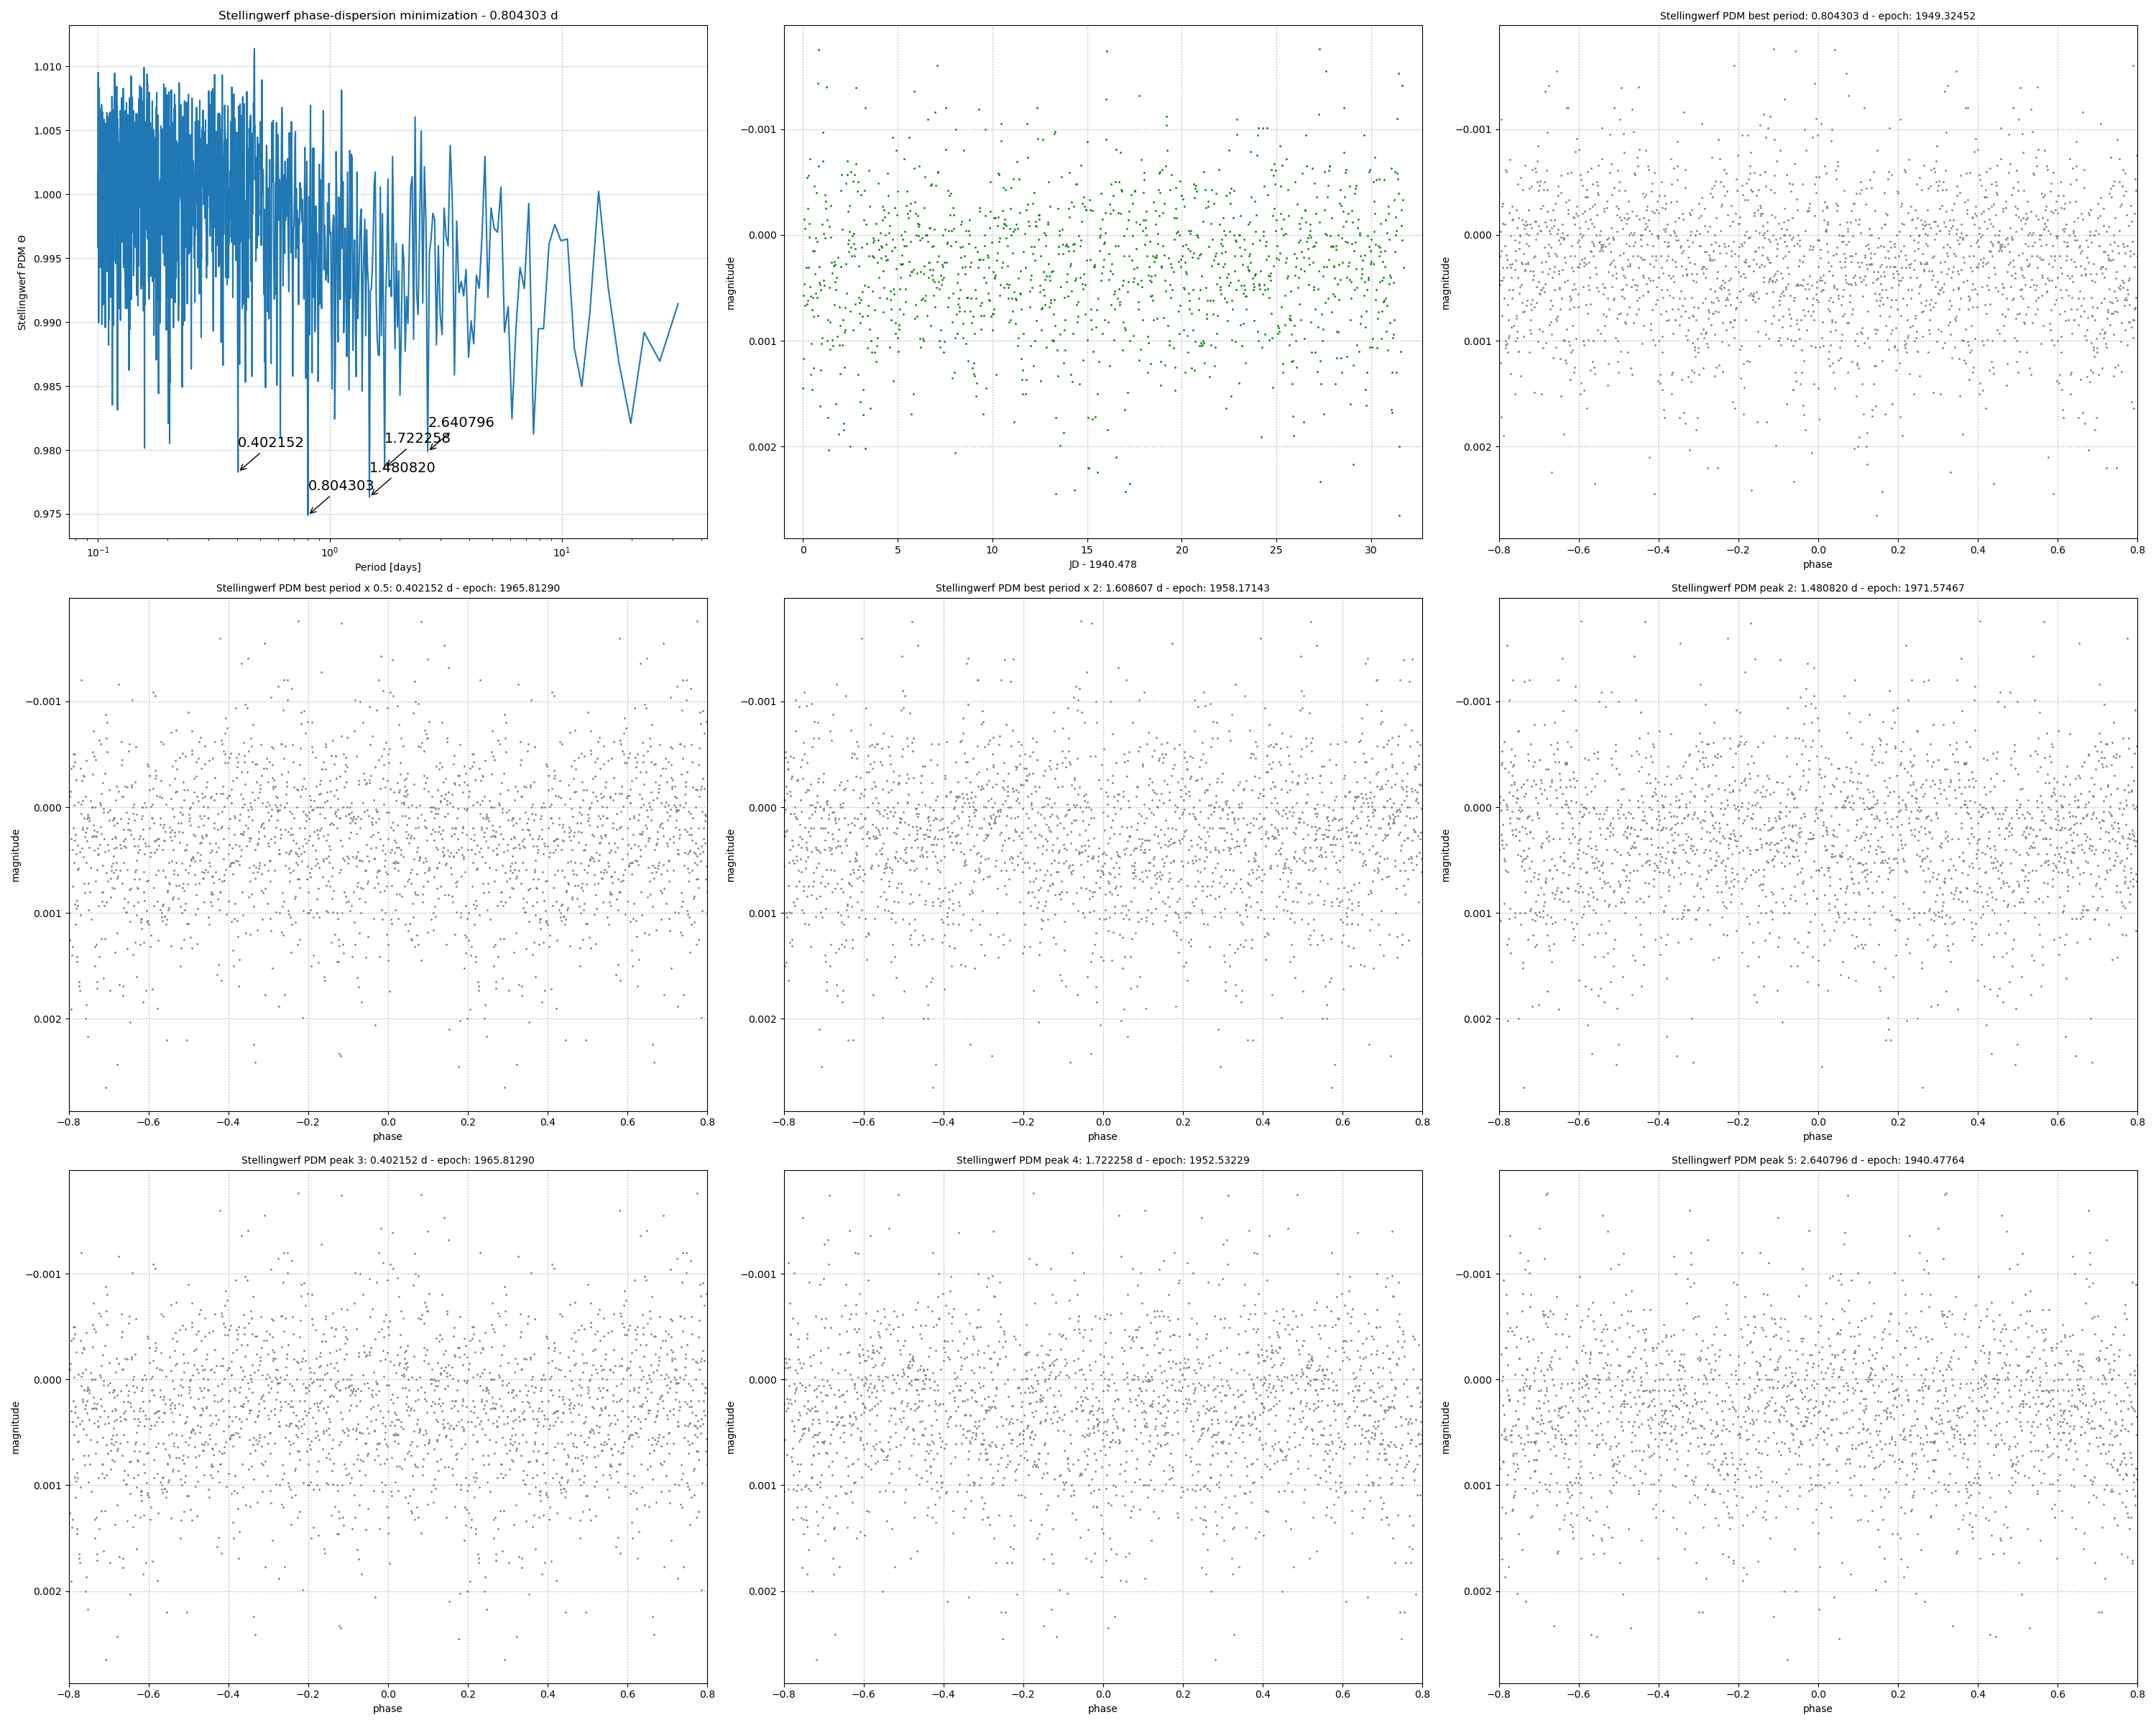

In [15]:
Image('0000668-checkplot-spdm.png')

In [16]:
print('PDM algorithm:',(spdm['nbestperiods']),'(days)')

PDM algorithm: [0.8043034172588857, 1.480820310280378, 0.40215170862944283, 1.7222584043478313, 2.640796220000008] (days)
